# Image filtring

In signal processing, a digital filter is a system that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal. 


The goal of image filtring is to modify or enhance image properties and/or to extract valuable information from the pictures such as edges, corners, and blobs. Here are some examples of what applying filters can do to make images more visually appealing.

# Moving avrage filter (1D signal)


The moving average filter is a simple Low Pass FIR (Finite Impulse Response) filter commonly used for smoothing an array of sampled data/signal. It takes L samples of input at a time and takes the average of those L-samples and produces a single output point.

As the filter length increases (the parameter L) the smoothness of the output increases

The MA filter performs three important functions:
It takes L input points, computes the average of those L-points and produces a single output point


# Creating a noisiy 1D signal


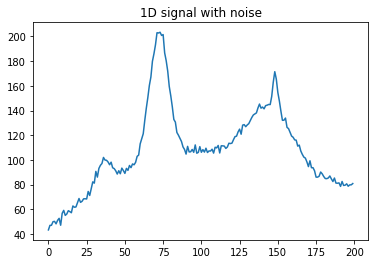

In [2]:
nb_points  = 200
x = np.linspace(50, 600, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/20.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/50.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/300)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
noisy_signal = p1 + p2 + p3 + p4 + p5 + noise +bkg
A = np.convolve(noisy_signal,[1,2,4,2,1], 'valid')
plt.title("1D signal with noise")
plt.plot(noisy_signal)

# Filtring a 1D signal with moving avrage filter
we can use the **numpy.convolve** to applay 1d convolution of the signal and the filter


(<AxesSubplot:title={'center':'filtred signal'}>,
 Text(0.5, 1.0, 'filtred signal'))

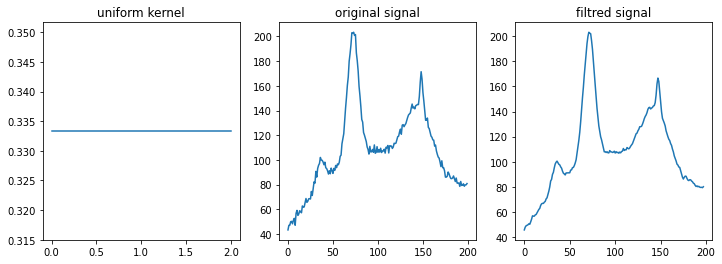

In [8]:
L=3
ma_filter=np.ones(L)/L
smothed_signal=np.convolve(noisy_signal,ma_filter,'valid')

fig = plt.figure(figsize=plt.figaspect(1/3))
plt.subplot(131),plt.plot(ma_filter),plt.title("uniform kernel")
plt.subplot(132),plt.plot(noisy_signal),plt.title("original signal")
plt.subplot(133),plt.plot(smothed_signal),plt.title("filtred signal")

Change L to see the effect of the filter length on the output signal

In [9]:
from ipywidgets import interact
@interact(L=(3,75,2))
def uniform_1d_filtring(L=3):
    ma_filter=np.ones(L)/L
    smothed_signal=np.convolve(noisy_signal,ma_filter,'valid')
    fig = plt.figure(figsize=plt.figaspect(1/3))
    plt.subplot(131),plt.plot(ma_filter),plt.title("uniform kernel")
    plt.subplot(132),plt.plot(noisy_signal),plt.title("original signal")
    plt.subplot(133),plt.plot(smothed_signal),plt.title("filtred signal")

    plt.show()


interactive(children=(IntSlider(value=3, description='L', max=75, min=3, step=2), Output()), _dom_classes=('wi…

# Image filtering via 2D correlation (some times refered to as convolution)

  

## Averaging filter

This is done by convolving the image with a normalized (**all elements sum up to one**) box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average.

![filter](media/filter2.png  "3x3 mean filter")

  
  

OpenCV provides a function, **cv2.filter2D()**, to convolve a kernel with an image.

  
  


`	cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	) -> 	dst`

The function applies an arbitrary linear filter to an image. In-place operation is supported. When the aperture is partially outside the image, the function interpolates outlier pixel values according to the specified border mode.

  
  

**Parameters**
**src** input image. 

**dst** output image of the same size and the same number of channels as src.

**ddepth** desired depth of the destination image, see combinations

 **kernel** convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; * if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
 
**anchor** anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.    
 **delta** optional value added to the filtered    pixels before storing them in dst.    
 
**borderType** pixel    extrapolation method, see BorderTypes. BORDER_WRAP is not suppo
rted.



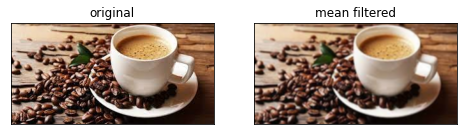

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt # w use plt in rather than pyplot 

#helper functions defined in utility.py
from utility import sbs,cv_show
img = cv.imread('image/cofee.jpg')

kernel = np.ones((3,3),np.float32)/9
dst = cv.filter2D(img,-1,kernel)
fig = plt.figure(figsize=plt.figaspect(1/2))
sbs(img,dst,"original","mean filtered")


# Filtring a 1D signal with a gaussian 

To create a gaussian kernel, we can use opncv **getGaussianKernel(ksize,sigma)**

**ksize** size of the **1D** kernel

**sigma** the standard diviation 


In [13]:
from ipywidgets import interact
@interact(ksize=(3,75,2),sigma=(0.001,10))
def gaussian_1d_filtring(ksize=3,sigma=1):
    kernel=cv.getGaussianKernel(ksize,sigma)
    # getGaussianKernel returns a 3x1 matrix 
    # we need to transpose it to get 1x3 matrix and then acces the first row to get a 1d array    
    gaussian_kernel_1d = kernel.transpose()[0]
    fig = plt.figure(figsize=plt.figaspect(1/3))

    smothed_signal=np.convolve(noisy_signal,gaussian_kernel_1d,'valid')
    plt.subplot(131),plt.plot(gaussian_kernel_1d),plt.title("gaussian kernel")
    plt.subplot(132),plt.plot(noisy_signal),plt.title("original signal")
    plt.subplot(133),plt.plot(smothed_signal),plt.title("filtred signal")

    plt.show()


interactive(children=(IntSlider(value=3, description='ksize', max=75, min=3, step=2), FloatSlider(value=1.0, d…

# Filtring an image with a 2D gaussian kernel

In [6]:

from ipywidgets import interact
@interact(ksize=(3,75,2),sigma=(0.1,22))
def sho_gaussian_kernel(ksize,sigma):
    gk=cv.getGaussianKernel(ksize,sigma)
    kernel = gk @ gk.transpose() 
    X = np.arange(0, ksize)
    Y = np.arange(0, ksize)
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure(figsize=plt.figaspect(1/3))
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    surf = ax.plot_surface(X, Y, kernel) 
    plt.title("gaussian kernel")
    ax = fig.add_subplot(1, 3, 2)
    cv_show(img)
    plt.title("original image")
    ax = fig.add_subplot(1, 3, 3)
    smothed_img = cv.filter2D(img,-1,kernel)
    cv_show(smothed_img)
    plt.title("filtred image")

    plt.show()




interactive(children=(IntSlider(value=39, description='ksize', max=75, min=3, step=2), FloatSlider(value=11.04…

## discrete approximation of gaussian filter

To apply a gaussian filter we use a discrete approximation.


 ![3x3,5x5,7x7 gaussian kernels](media/gkr.png "")



In [ ]:
img = cv.imread('image/cofee.jpg')

#create the gaussian kernel
kernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/16

dst = cv.filter2D(img,-1,kernel)
fig = plt.figure(figsize=plt.figaspect(1/2))

sbs(img,dst,"original","gaussian filtered")